In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import joblib

Load the dataset

In [3]:

data = pd.read_csv("HepatitisCdata.csv")

Preprocess the data

In [4]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data['Category'] = data['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                         "1=Hepatitis": 1, "2=Fibrosis": 1, "3=Cirrhosis": 1})
data['Sex'] = data['Sex'].map({'m': 1, 'f': 0})

Rename columns for better readability

In [5]:
new_cols = {'ALB': 'Albumin Blood Test (ALB) g/L',
            'ALP': 'Alkaline Phosphatase Test (ALP) IU/L',
            'ALT': 'Alanine Transaminase Test (ALT) U/L',
            'AST': 'Aspartate Transaminase Test (AST) U/L',
            'BIL': 'Bilirubin Blood Test (BIL) µmol/L',
            'CHE': 'Cholinesterase (CHE) kU/L',
            'CHOL': 'Cholesterol (CHOL) mmol/L',
            'CREA': 'Creatinine Blood Test (CREA) µmol/L',
            'GGT': 'Gamma-Glutamyl Transpeptidase Test (GGT) U/L',
            'PROT': 'Protein Blood Test (PROT) g/L'}
data.rename(columns=new_cols, inplace=True)

Handle missing values

In [6]:
data.fillna(data.median(), inplace=True)

Split the data into features and target

In [7]:
X = data.drop('Category', axis=1)
y = data['Category']

Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize the RandomForestClassifier

In [9]:
rf_model = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300, 1000],
    'max_depth': [40, 80, 90],
    'max_features': [2, 3],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True]
}

# Initialize GridSearchCV
rf_grid_model = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit the model
rf_grid_model.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_model = rf_grid_model.best_estimator_

import pickle

# Save the best Random Forest model to a .pkl file
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

print("✅ Model saved as best_rf_model.pkl")


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
✅ Model saved as best_rf_model.pkl


Evaluate the model

In [9]:
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best RandomForest model: {accuracy * 100:.2f}%")

Accuracy of the best RandomForest model: 93.50%


Plot the confusion matrix

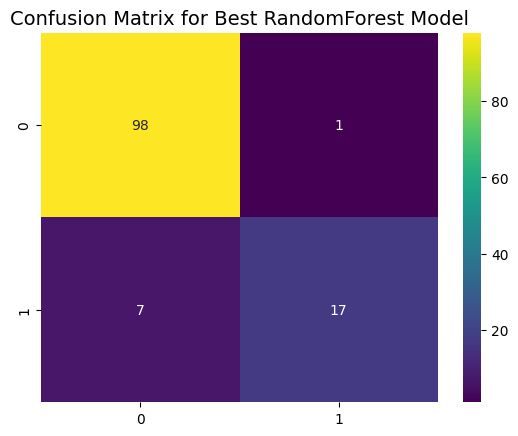

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix for Best RandomForest Model", fontsize=14)
plt.show()

Save the best model

In [11]:
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

TEST

In [12]:
# Function to predict Hepatitis C status
def predict_hepatitis_c(patient_data):
    # Load the saved model
    loaded_model = joblib.load('best_rf_model.pkl')
    
    # Convert input data to DataFrame
    patient_df = pd.DataFrame([patient_data])
    
    # Make prediction
    prediction = loaded_model.predict(patient_df)
    
    # Interpret the result
    if prediction[0] == 1:
        return "The patient has Hepatitis C."
    else:
        return "The patient does not have Hepatitis C."

In [13]:
# Example patient data for prediction
patient_data = {
    'Age': 45,
    'Sex': 1,  # 1 for male, 0 for female
    'Albumin Blood Test (ALB) g/L': 40,
    'Alkaline Phosphatase Test (ALP) IU/L': 85,
    'Alanine Transaminase Test (ALT) U/L': 20,
    'Aspartate Transaminase Test (AST) U/L': 30,
    'Bilirubin Blood Test (BIL) µmol/L': 15,
    'Cholinesterase (CHE) kU/L': 7.5,
    'Cholesterol (CHOL) mmol/L': 5.0,
    'Creatinine Blood Test (CREA) µmol/L': 70,
    'Gamma-Glutamyl Transpeptidase Test (GGT) U/L': 35,
    'Protein Blood Test (PROT) g/L': 75
}

# Predict and print result
result = predict_hepatitis_c(patient_data)
print(result)

The patient does not have Hepatitis C.


In [14]:
patient_data_possible_hepatitis_c = {
    'Age': 50,
    'Sex': 0,  # 0 for female
    'Albumin Blood Test (ALB) g/L': 35,  # Slightly lower than normal
    'Alkaline Phosphatase Test (ALP) IU/L': 120,  # Higher than normal
    'Alanine Transaminase Test (ALT) U/L': 80,  # Higher than normal
    'Aspartate Transaminase Test (AST) U/L': 70,  # Higher than normal
    'Bilirubin Blood Test (BIL) µmol/L': 25,  # Higher than normal
    'Cholinesterase (CHE) kU/L': 6.0,  # Lower than normal
    'Cholesterol (CHOL) mmol/L': 4.5,  # Lower than normal
    'Creatinine Blood Test (CREA) µmol/L': 80,  # Slightly higher than normal
    'Gamma-Glutamyl Transpeptidase Test (GGT) U/L': 100,  # Higher than normal
    'Protein Blood Test (PROT) g/L': 65  # Slightly lower than normal
}

# Predict and print result
result_possible_hepatitis_c = predict_hepatitis_c(patient_data_possible_hepatitis_c)
print(result_possible_hepatitis_c)


The patient has Hepatitis C.
